# 猫狗识别 V3

## 优化模型

#### 定义一个包含dropout的新卷积神经网络

In [1]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### 准备数据

In [3]:
import PreProcess

### 使用数据增强

In [4]:
import DataAugment

#### 利用数据增强生成器训练网络

In [5]:
train_generator, validation_generator, test_generator = DataAugment.create_dataflow()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### 模型拟合

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 25s 249ms/step - loss: 0.6931 - acc: 0.5166 - val_loss: 0.6771 - val_acc: 0.5768
Epoch 2/100
100/100 [==============================] - 21s 213ms/step - loss: 0.6772 - acc: 0.5684 - val_loss: 0.7735 - val_acc: 0.5084
Epoch 3/100
100/100 [==============================] - 22s 225ms/step - loss: 0.6558 - acc: 0.5981 - val_loss: 0.6407 - val_acc: 0.6136
Epoch 4/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6402 - acc: 0.6219 - val_loss: 0.6180 - val_acc: 0.6630
Epoch 5/100
100/100 [==============================] - 23s 226ms/step - loss: 0.6200 - acc: 0.6534 - val_loss: 0.6164 - val_acc: 0.6307
Epoch 6/100
100/100 [==============================] - 25s 245ms/step - loss: 0.6141 - acc: 0.6541 - val_loss: 0.6004 - val_acc: 0.6591
Epoch 7/100
100/100 [==============================] - 21s 215ms/step - loss: 0.6018 - acc: 0.6737 - val_loss: 0.5709 - val_acc: 0.6891
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 23s 231ms/step - loss: 0.4160 - acc: 0.8088 - val_loss: 0.4137 - val_acc: 0.8131
Epoch 62/100
100/100 [==============================] - 21s 214ms/step - loss: 0.4057 - acc: 0.8128 - val_loss: 0.4483 - val_acc: 0.8071
Epoch 63/100
100/100 [==============================] - 23s 234ms/step - loss: 0.3947 - acc: 0.8175 - val_loss: 0.4594 - val_acc: 0.7861
Epoch 64/100
100/100 [==============================] - 23s 226ms/step - loss: 0.4095 - acc: 0.8116 - val_loss: 0.4410 - val_acc: 0.8009
Epoch 65/100
100/100 [==============================] - 21s 213ms/step - loss: 0.3927 - acc: 0.8256 - val_loss: 0.5099 - val_acc: 0.7817
Epoch 66/100
100/100 [==============================] - 23s 229ms/step - loss: 0.4013 - acc: 0.8166 - val_loss: 0.4035 - val_acc: 0.8293
Epoch 67/100
100/100 [==============================] - 23s 228ms/step - loss: 0.3972 - acc: 0.8141 - val_loss: 0.4309 - val_acc: 0.8135
Epoch 68/100
100/100 [===================

#### 保存训练好的模型

In [11]:
model.save('cats_and_dogs_small_2.h5')

#### 描绘训练结果

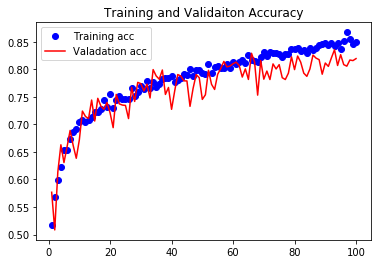

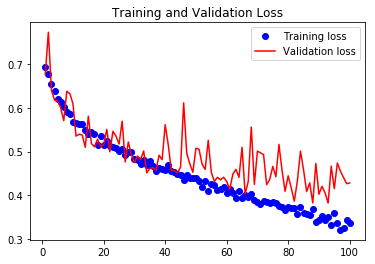

In [12]:
history_list = history.history
acc = history_list['acc']
val_acc = history_list['val_acc']
loss = history_list['loss']
val_loss = history_list['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Valadation acc')
plt.title('Training and Validaiton Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## 使用预训练的卷积神经网络

想要将深度学习应用与小型图像数据集,一种常用且非常高校的方法是使用预训练网络.

预训练网络(pretrained network)是一个保存我好的网络,之前已在大型数据集(通常是大规模图像分类任务上训练好).

如果这个原始数据集足够大且足够通用,那么预训练网络学到的特征的空间层级结构可以有效地作为世界的通用模型,因此这些特征可用于各种不同的计算机视觉问题.



使用预训练网络有两张方法:**特征提取**(feature extraction)和**微调模型**(fine tuning).

#### 将VGG16卷积基实例化

In [6]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(conv_base, to_file='VGG.png',show_shapes=True)

### 1. 不使用数据增强的快速特征提取

#### 使用预训练的卷积基提取特征

In [10]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_counts):
    features = np.zeros(shape = (sample_counts, 4, 4, 512))
    labels = np.zeros(shape = (sample_counts))
    generator = datagen.flow_from_directory(
        directory, 
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_counts:
            break
    return features, labels

In [12]:
train_features, train_labels = extract_features(PreProcess.train_dir, 2000)
validation_features, validation_labels = extract_features(PreProcess.validation_dir, 1000)
test_features, test_labels = extract_features(PreProcess.test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


目前，提取的特征形状为(sample_count, 4, 4, 512)。我们要将起输入到密集链接分类器中，所以首先必须将其形状展成(sample_counts, 8192).

In [13]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 *512))

#### 定义并训练密集链接分类器

In [14]:
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 *512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_features, 
                    train_labels, 
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 514us/step - loss: 0.6228 - acc: 0.6495 - val_loss: 0.4488 - val_acc: 0.8360
Epoch 2/30
2000/2000 [==============================] - 1s 410us/step - loss: 0.4230 - acc: 0.8105 - val_loss: 0.3689 - val_acc: 0.8460
Epoch 3/30
2000/2000 [==============================] - 1s 410us/step - loss: 0.3567 - acc: 0.8495 - val_loss: 0.3259 - val_acc: 0.8680
Epoch 4/30
2000/2000 [==============================] - 1s 413us/step - loss: 0.3195 - acc: 0.8695 - val_loss: 0.2997 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 1s 412us/step - loss: 0.2800 - acc: 0.8875 - val_loss: 0.2842 - val_acc: 0.8920
Epoch 6/30
2000/2000 [==============================] - 1s 413us/step - loss: 0.2648 - acc: 0.8930 - val_loss: 0.2719 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 1s 419us/step - loss: 0.2456 - acc: 0.9055 - val_loss: 0.2635 - val_acc: 0.9020


#### 绘制结果

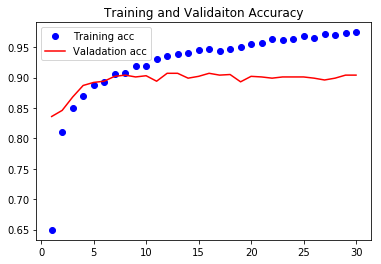

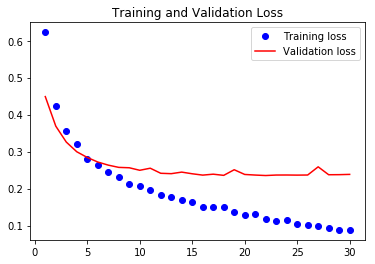

In [16]:
import matplotlib.pyplot as plt
history_list = history.history
acc = history_list['acc']
val_acc = history_list['val_acc']
loss = history_list['loss']
val_loss = history_list['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Valadation acc')
plt.title('Training and Validaiton Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### 2. 使用数据增强的特征提取

扩展conv_base模型,然后在输入数据上端到端地运行模型.

模型的行为和层类似,所以可以想Sequential模型中添加一个模型(比如conv_base),就像添加一个层一样.

在编译和训练模型之前,一定要**冻结**卷积基.

冻结(freeze)一个或多个层是指在训练过程中保持其权重不变.

如果不这么做,那么卷积基之前学到的表示将会在训练过程中被修改.

因为其上添加的Dense层是随机初始化的,所以非常大的权重更新将会在网络中传播,对之前学到的表示造成很大的破坏.


#### 在卷积基上添加一个密集连接的分类器

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [26]:
conv_base.trainable = False

#### 利用冻结的卷积基端到端地训练模型

In [27]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [28]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 25s 249ms/step - loss: 0.5803 - acc: 0.7025 - val_loss: 0.4333 - val_acc: 0.8280
Epoch 2/30
100/100 [==============================] - 22s 223ms/step - loss: 0.4633 - acc: 0.7941 - val_loss: 0.3492 - val_acc: 0.8673
Epoch 3/30
100/100 [==============================] - 23s 226ms/step - loss: 0.4087 - acc: 0.8206 - val_loss: 0.3082 - val_acc: 0.8820
Epoch 4/30
100/100 [==============================] - 24s 238ms/step - loss: 0.3833 - acc: 0.8297 - val_loss: 0.2992 - val_acc: 0.8763
Epoch 5/30
100/100 [==============================] - 22s 216ms/step - loss: 0.3675 - acc: 0.8434 - val_loss: 0.2830 - val_acc: 0.8852
Epoch 6/30
100/100 [==============================] - 25s 252ms/step - loss: 0.3439 - acc: 0.8531 - val_loss: 0.2587 - val_acc: 0.8988
Epoch 7/30
100/100 [==============================] - 23s 231ms/step - loss: 0.3395 - acc: 0.8559 - val_loss: 0.2652 - val_acc: 0.8928
Epoch 8/30
100/100 [==============================] - 2

#### 绘制结果

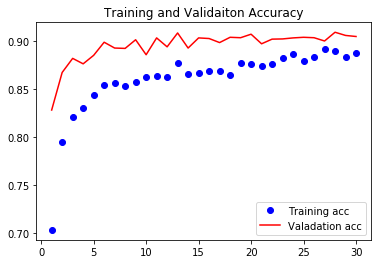

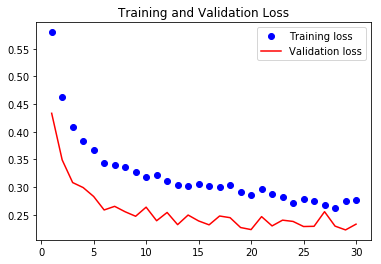

In [29]:
import matplotlib.pyplot as plt

history_list = history.history
acc = history_list['acc']
val_acc = history_list['val_acc']
loss = history_list['loss']
val_loss = history_list['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Valadation acc')
plt.title('Training and Validaiton Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [23]:
model.save('cats_and_dogs_small_3.h5')

##  微调模型(fine-tuning)

模型微调与特征提取互为补充。

对于用于特征提取的冻结的模型基，微调是指将其顶部的几层“解冻”，并将这解冻的几层和新增加的部分(本例中是全连接分类器)联合训练。

之所以叫作微调，是因为它只是略微调整了所复用模型中更加抽象的表示，以便让这些表示与手头的问题更加相关。

微调网络的步骤如下：

1. 在已经训练好的基网络(base network)上添加自定义网络
2. 冻结基网络
3. 训练所添加的部分
4. 解冻基网络的一些层
5. 联合训练解冻的这些层和添加的部分

#### 冻结直到某一层的所有层

In [30]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

#### 微调模型

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
              
history = model.fit_generator(      
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/100
100/100 [==============================] - 24s 238ms/step - loss: 0.2791 - acc: 0.8828 - val_loss: 0.2496 - val_acc: 0.8985
Epoch 2/100
100/100 [==============================] - 24s 238ms/step - loss: 0.2298 - acc: 0.9025 - val_loss: 0.2169 - val_acc: 0.9143
Epoch 3/100
100/100 [==============================] - 23s 230ms/step - loss: 0.2208 - acc: 0.9097 - val_loss: 0.1930 - val_acc: 0.9220
Epoch 4/100
100/100 [==============================] - 24s 239ms/step - loss: 0.1953 - acc: 0.9219 - val_loss: 0.2018 - val_acc: 0.9169
Epoch 5/100
100/100 [==============================] - 22s 218ms/step - loss: 0.1837 - acc: 0.9228 - val_loss: 0.1889 - val_acc: 0.9213
Epoch 6/100
100/100 [==============================] - 25s 253ms/step - loss: 0.1742 - acc: 0.9294 - val_loss: 0.2278 - val_acc: 0.9098
Epoch 7/100
100/100 [==============================] - 23s 232ms/step - loss: 0.1631 - acc: 0.9341 - val_loss: 0.1859 - val_acc: 0.9264
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 24s 235ms/step - loss: 0.0153 - acc: 0.9947 - val_loss: 0.2731 - val_acc: 0.9356
Epoch 62/100
100/100 [==============================] - 24s 238ms/step - loss: 0.0201 - acc: 0.9922 - val_loss: 0.3507 - val_acc: 0.9302
Epoch 63/100
100/100 [==============================] - 22s 223ms/step - loss: 0.0239 - acc: 0.9897 - val_loss: 0.2449 - val_acc: 0.9369
Epoch 64/100
100/100 [==============================] - 23s 229ms/step - loss: 0.0192 - acc: 0.9913 - val_loss: 0.2175 - val_acc: 0.9362
Epoch 65/100
100/100 [==============================] - 23s 230ms/step - loss: 0.0187 - acc: 0.9925 - val_loss: 0.2817 - val_acc: 0.9346
Epoch 66/100
100/100 [==============================] - 22s 218ms/step - loss: 0.0194 - acc: 0.9922 - val_loss: 0.2027 - val_acc: 0.9381
Epoch 67/100
100/100 [==============================] - 23s 234ms/step - loss: 0.0132 - acc: 0.9962 - val_loss: 0.2846 - val_acc: 0.9372
Epoch 68/100
100/100 [===================

#### 绘制结果

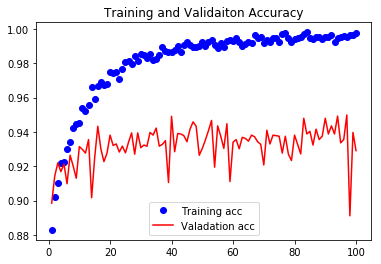

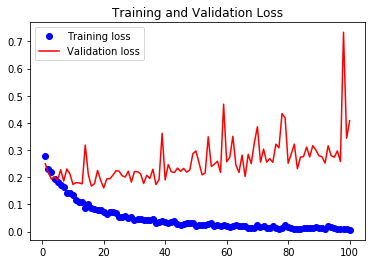

In [34]:
import matplotlib.pyplot as plt

history_list = history.history
acc = history_list['acc']
val_acc = history_list['val_acc']
loss = history_list['loss']
val_loss = history_list['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Valadation acc')
plt.title('Training and Validaiton Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

#### 使曲线平滑

In [35]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points【-1】
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

SyntaxError: invalid character in identifier (<ipython-input-35-4d3184b32be6>, line 5)

In [ ]:
plt.plot(epochs, smooth_curve(acc), 'bo', label = 'Training acc')
plt.plot(epochs, smooth_curve(val_acc), 'r', label = 'Valadation acc')
plt.title('Training and Validaiton Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label = 'Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

#### 在测试集上评估模型

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print("test acc:", test_acc)